# Import Mushroom Data
## Relevant information
This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as definitely edible, definitely poisonous, or of 	unknown edibility and not recommended (the latter class was combined with the poisonous class). 	Of the 20 variables, 17 are nominal and 3 are metrical.

## Class Information
**class**: poisonous=p, edible=e (binary)

## Variable Information
n: nominal, m: metrical; nominal values as sets of values

| **Variable**             | **Type** | **Description/Values**                                                                 |
|--------------------------|----------|----------------------------------------------------------------------------------------|
| **cap-diameter**          | m        | Float number in cm                                                                      |
| **cap-shape**             | n        | bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o                   |
| **cap-surface**           | n        | fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e |
| **cap-color**             | n        | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k |
| **does-bruise-bleed**     | n        | bruises-or-bleeding=t, no=f                                                            |
| **gill-attachment**       | n        | adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?        |
| **gill-spacing**          | n        | close=c, distant=d, none=f                                                             |
| **gill-color**            | n        | see cap-color + none=f                                                                  |
| **stem-height**           | m        | Float number in cm                                                                      |
| **stem-width**            | m        | Float number in mm                                                                      |
| **stem-root**             | n        | bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r                  |
| **stem-surface**          | n        | see cap-surface + none=f                                                                |
| **stem-color**            | n        | see cap-color + none=f                                                                  |
| **veil-type**             | n        | partial=p, universal=u                                                                  |
| **veil-color**            | n        | see cap-color + none=f                                                                  |
| **has-ring**              | n        | ring=t, none=f                                                                          |
| **ring-type**             | n        | cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=? |
| **spore-print-color**     | n        | see cap color                                                                           |
| **habitat**               | n        | grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d            |
| **season**                | n        | spring=s, summer=u, autumn=a, winter=w                                                  |


### Import libraries

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from IPython.display import display as display

### Read data from csv

In [167]:
df = pd.read_csv('secondary_data.csv', sep=';')
df_secondary = df.copy()
display(df.head())

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


### Analyze data

In [168]:
print("MUSHROOM DATAFRAME \n Size of the table:", df.shape)
print("\n Columns: \n", df.keys())
print("\n Data types: \n", df.dtypes)

MUSHROOM DATAFRAME 
 Size of the table: (61069, 21)

 Columns: 
 Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

 Data types: 
 class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type   

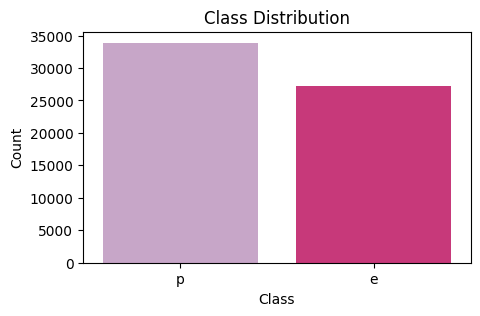

In [169]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='class', hue='class', palette='PuRd', legend=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [170]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
display(df.head(3))

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,6,2,6,0,2,3,10,16.95,...,4,7,11,0,4,1,2,7,0,3
1,1,16.60,6,2,6,0,2,3,10,17.99,...,4,7,11,0,4,1,2,7,0,2
2,1,14.07,6,2,6,0,2,3,10,17.80,...,4,7,11,0,4,1,2,7,0,3


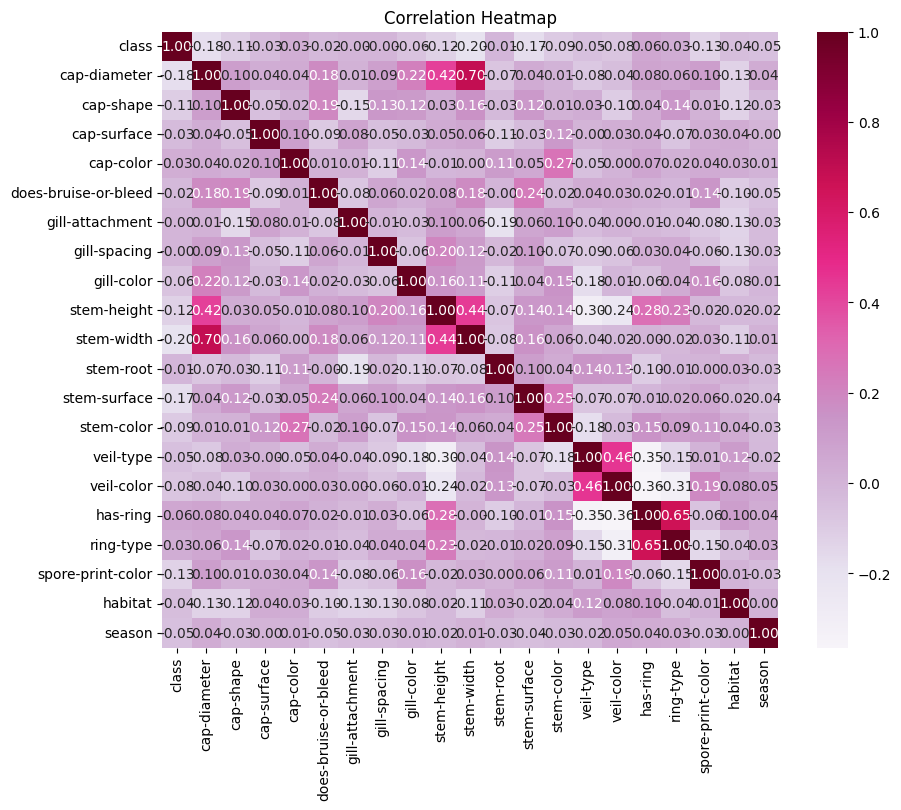

In [171]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [172]:
threshold = 0.65
corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr = corr_pairs[(corr_pairs < 1.0) & (corr_pairs > threshold)]
print(high_corr)

cap-diameter  stem-width      0.695330
stem-width    cap-diameter    0.695330
has-ring      ring-type       0.653726
ring-type     has-ring        0.653726
dtype: float64


# Preprocessing

## Label Encoding

## Feature Importance

In [173]:
x = df.drop(columns=['class'])
y = df['class']

In [174]:
chi_scores = chi2(x, y)
chi_df = pd.DataFrame({
    'Feature': x.columns,
    'Chi2Score': chi_scores[0],
    'PValue': chi_scores[1]
}).sort_values(by='Chi2Score', ascending=False)

display(chi_df)

,Feature,Chi2Score,PValue
9,stem-width,19720.924557,0.000000e+00
0,cap-diameter,8247.956024,0.000000e+00
8,stem-height,1558.001245,0.000000e+00
11,stem-surface,1236.570197,6.881351e-271
1,cap-shape,781.030569,7.184866e-172
12,stem-color,674.073234,1.299576e-148
17,spore-print-color,314.912143,1.858549e-70
7,gill-color,311.317123,1.127977e-69
18,habitat,275.752988,6.325846e-62
19,season,205.129648,1.586707e-46


In [175]:
chi_threshold = 100
significant_features = chi_df[chi_df['Chi2Score'] > chi_threshold]['Feature'].values
print(significant_features)
print(significant_features.shape)

['stem-width' 'cap-diameter' 'stem-height' 'stem-surface' 'cap-shape'
 'stem-color' 'spore-print-color' 'gill-color' 'habitat' 'season'
 'has-ring' 'ring-type' 'cap-surface']
(13,)


In [176]:
#x = x[significant_features]
#display(x.head())
#print("X DATAFRAME \n Size of the table:", x.shape)

## Data splitting

In [177]:
x = df.drop(columns=['class'])
y = df['class']

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=1)

In [179]:
display(x_train.head())
print("X TRAIN DATAFRAME \n Size of the table:", x_train.shape)
print("\n Columns: \n", x_train.keys())
display(x_test.head())
print("X TEST DATAFRAME \n Size of the table:", x_test.shape)
print("\n Columns: \n", x_test.keys())

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
16680,7.87,2,3,6,0,5,3,5,9.49,12.09,5,6,6,1,6,0,1,7,0,0
50692,2.76,6,0,5,0,4,3,1,4.19,8.59,5,8,6,1,6,0,1,7,0,0
40942,3.00,6,8,5,0,5,0,7,4.87,8.15,5,8,11,1,2,1,7,7,0,0
659,6.14,6,2,5,0,2,3,10,7.20,13.51,5,7,11,0,4,1,5,7,0,0
35521,10.55,6,10,11,0,0,0,5,12.10,14.13,5,7,12,1,6,1,8,7,0,2


X TRAIN DATAFRAME 
 Size of the table: (48855, 20)

 Columns: 
 Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
12471,1.72,6,7,11,0,1,3,10,7.01,2.36,5,6,12,1,6,0,1,7,2,2
57160,9.59,2,1,0,0,7,0,0,4.73,20.49,5,8,11,1,6,1,1,7,0,0
10222,0.86,6,2,7,0,0,3,7,4.25,1.05,5,5,4,1,6,0,1,7,0,1
23923,4.32,6,11,1,0,6,3,10,4.91,6.58,5,8,11,1,6,0,1,7,0,2
18970,2.80,6,7,10,0,1,1,10,3.13,5.69,5,8,11,1,6,0,1,7,4,0


X TEST DATAFRAME 
 Size of the table: (12214, 20)

 Columns: 
 Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')


In [180]:
display(y_train.head())
print("Y TRAIN DATAFRAME \n Size of the table:", y_train.shape)
print("\n Columns: \n", y_train.keys())
display(y_test.head())
print("Y TEST DATAFRAME \n Size of the table:", y_test.shape)
print("\n Columns: \n", y_test.keys())

,class
16680,0
50692,0
40942,1
659,1
35521,1


Y TRAIN DATAFRAME 
 Size of the table: (48855,)

 Columns: 
 Index([16680, 50692, 40942,   659, 35521, 37411, 36958, 39327,  4436,  8347,
       ...
       32912, 21440, 52047,  7813, 43723, 50057, 32511,  5192, 12172, 33003],
      dtype='int64', length=48855)


,class
12471,0
57160,0
10222,1
23923,1
18970,0


Y TEST DATAFRAME 
 Size of the table: (12214,)

 Columns: 
 Index([12471, 57160, 10222, 23923, 18970, 60810, 21178, 27273, 42906, 22410,
       ...
       19062, 44203, 16388, 27318, 31156, 34755, 15175, 40635, 39003, 30554],
      dtype='int64', length=12214)


## Data Scaling

In [181]:
scaled_x_train = MinMaxScaler().fit_transform(x_train)
scaled_x_train = pd.DataFrame(scaled_x_train, columns=x_train.columns)
display(scaled_x_train.head())
print("Size of the dataframe:", scaled_x_train.shape)

scaled_x_test = MinMaxScaler().fit_transform(x_test)
scaled_x_test = pd.DataFrame(scaled_x_test, columns=x_test.columns)
display(scaled_x_test.head())
print("Size of the dataframe:", scaled_x_test.shape)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0.126777,0.333333,0.272727,0.545455,0.0,0.714286,1.0,0.454545,0.279776,0.116351,1.0,0.750,0.500000,1.0,1.000000,0.0,0.125,1.0,0.0,0.000000
1,0.040284,1.000000,0.000000,0.454545,0.0,0.571429,1.0,0.090909,0.123526,0.082668,1.0,1.000,0.500000,1.0,1.000000,0.0,0.125,1.0,0.0,0.000000
2,0.044347,1.000000,0.727273,0.454545,0.0,0.714286,0.0,0.636364,0.143573,0.078433,1.0,1.000,0.916667,1.0,0.333333,1.0,0.875,1.0,0.0,0.000000
3,0.097495,1.000000,0.181818,0.454545,0.0,0.285714,1.0,0.909091,0.212264,0.130016,1.0,0.875,0.916667,0.0,0.666667,1.0,0.625,1.0,0.0,0.000000
4,0.172139,1.000000,0.909091,1.000000,0.0,0.000000,0.0,0.454545,0.356722,0.135983,1.0,0.875,1.000000,1.0,1.000000,1.0,1.000,1.0,0.0,0.666667


Size of the dataframe: (48855, 20)


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0.020679,1.000000,0.636364,1.000000,0.0,0.142857,1.000000,0.909091,0.207888,0.024699,1.0,0.750,1.000000,1.0,1.0,0.0,0.125,1.0,0.285714,0.666667
1,0.147819,0.333333,0.090909,0.000000,0.0,1.000000,0.000000,0.000000,0.140273,0.214443,1.0,1.000,0.916667,1.0,1.0,1.0,0.125,1.0,0.000000,0.000000
2,0.006785,1.000000,0.181818,0.636364,0.0,0.000000,1.000000,0.636364,0.126038,0.010989,1.0,0.625,0.333333,1.0,1.0,0.0,0.125,1.0,0.000000,0.333333
3,0.062682,1.000000,1.000000,0.090909,0.0,0.857143,1.000000,0.909091,0.145611,0.068864,1.0,1.000,0.916667,1.0,1.0,0.0,0.125,1.0,0.000000,0.666667
4,0.038126,1.000000,0.636364,0.909091,0.0,0.142857,0.333333,0.909091,0.092823,0.059550,1.0,1.000,0.916667,1.0,1.0,0.0,0.125,1.0,0.571429,0.000000


Size of the dataframe: (12214, 20)


## Logistic Regression

In [182]:
model_logistic = LogisticRegression()
model_logistic.fit(scaled_x_train, y_train)

LogisticRegression()

In [183]:
y_pred_logistic= model_logistic.predict(scaled_x_test)

In [184]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("Classification report \n", classification_report(y_test, y_pred_logistic))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.3f}")

Confusion Matrix:
[[2915 2490]
 [1743 5066]]
Classification report 
               precision    recall  f1-score   support

           0       0.63      0.54      0.58      5405
           1       0.67      0.74      0.71      6809

    accuracy                           0.65     12214
   macro avg       0.65      0.64      0.64     12214
weighted avg       0.65      0.65      0.65     12214

Accuracy: 0.653


# Neural Network

In [185]:
def get_model_simple(input_shape):
    model  =  Sequential([
                    Dense(128, activation='relu',input_shape=(input_shape[1],)),
                    Dense(1, activation='sigmoid')
    ])
    return model

In [186]:
def compile_model_simple(model):
    model.compile(optimizer= "adam", loss = "binary_crossentropy", metrics=['accuracy'])

In [187]:
def train_model_simple(model, scaled_x_train, y_train):
    history = model.fit(scaled_x_train, y_train, epochs = 10)
    return history

In [188]:
model_nn = get_model_simple(scaled_x_train.shape)
model_nn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
compile_model_simple(model_nn)

In [190]:
predichistory_nn = train_model_simple(model_nn, scaled_x_train, y_train)

Epoch 1/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6564 - loss: 0.6067
Epoch 2/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8489 - loss: 0.3756
Epoch 3/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9035 - loss: 0.2678
Epoch 4/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9360 - loss: 0.2007
Epoch 5/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9534 - loss: 0.1591
Epoch 6/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9645 - loss: 0.1326
Epoch 7/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9744 - loss: 0.1077
Epoch 8/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9806 - loss: 0.0897
Epoch 9/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0743
Epoch 10/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9878 - loss: 0.0639


In [191]:
prediction_probabilities = model_nn.predict(scaled_x_test)
prediction_classes = (prediction_probabilities > 0.5).astype(int)
prediction_classes = prediction_classes.flatten()
confusion_matrix_nn = confusion_matrix(y_test, prediction_classes)
print("Confusion Matrix:")
print(confusion_matrix_nn)
print("Classification report \n", classification_report(y_test, prediction_classes))

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix:
[[5375   30]
 [  97 6712]]
Classification report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5405
           1       1.00      0.99      0.99      6809

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



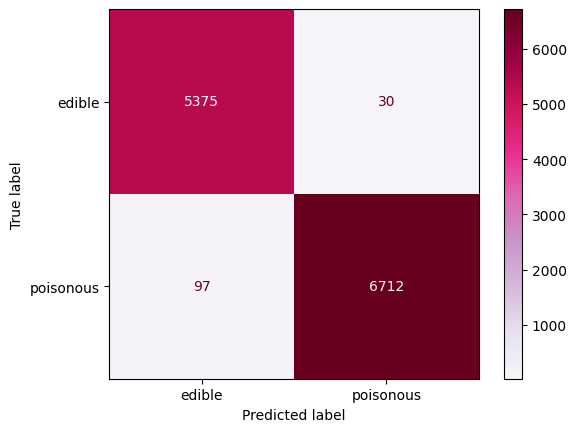

In [192]:
labels = ['edible','poisonous']
display_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_nn, display_labels=labels)
display_matrix.plot(cmap='PuRd')
plt.show()

## Second Model

In [193]:
df_secondary['veil-type'].describe()

,veil-type
count,3177
unique,1
top,u
freq,3177


In [194]:
df_secondary.drop(columns=['veil-type'], inplace=True)
object_columns = df_secondary.select_dtypes(include='object').columns

binary_columns = [column for column in object_columns if df_secondary[column].nunique()<= 2]
multi_columns = [column for column in object_columns if df_secondary[column].nunique() > 2]

print("Binary columns:", binary_columns)
print("Multi-class columns:", multi_columns)

Binary columns: ['class', 'does-bruise-or-bleed', 'has-ring']
Multi-class columns: ['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-color', 'ring-type', 'spore-print-color', 'habitat', 'season']


In [195]:
label_encoder = LabelEncoder()
for column in binary_columns:
    df_secondary[column] = label_encoder.fit_transform(df_secondary[column])

onehot_encoder = OneHotEncoder(sparse_output=False)
for column in multi_columns:
     encoded_array = onehot_encoder.fit_transform(df_secondary[[column]])
     encoded_df = pd.DataFrame(
        encoded_array,
        columns=onehot_encoder.get_feature_names_out([column]),
        index=df_secondary.index
    )
     df_secondary = df_secondary.drop(columns=[column])
     df_secondary = pd.concat([df_secondary, encoded_df], axis=1)

display(df_secondary.head())
print (df_secondary.select_dtypes(include='object').columns)

,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,1,15.26,0,16.95,17.09,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,16.60,0,17.99,18.19,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,14.07,0,17.80,17.74,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,14.17,0,15.77,15.98,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,14.64,0,16.53,17.20,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Index([], dtype='object')


In [196]:
x_secondary = df_secondary.drop(columns=['class'])
y_secondary = df_secondary['class']

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x_secondary, y_secondary, test_size=0.2, train_size=0.8, random_state=1)
scaled_x_train = MinMaxScaler().fit_transform(x_train)
scaled_x_train = pd.DataFrame(scaled_x_train, columns=x_train.columns)
display(scaled_x_train.head())
print("Size of the dataframe:", scaled_x_train.shape)

scaled_x_test = MinMaxScaler().fit_transform(x_test)
scaled_x_test = pd.DataFrame(scaled_x_test, columns=x_test.columns)
display(scaled_x_test.head())
print("Size of the dataframe:", scaled_x_test.shape)

,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0.126777,0.0,0.279776,0.116351,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.040284,0.0,0.123526,0.082668,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.044347,0.0,0.143573,0.078433,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.097495,0.0,0.212264,0.130016,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.172139,0.0,0.356722,0.135983,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Size of the dataframe: (48855, 124)


,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0.020679,0.0,0.207888,0.024699,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.147819,0.0,0.140273,0.214443,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.006785,0.0,0.126038,0.010989,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.062682,0.0,0.145611,0.068864,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.038126,0.0,0.092823,0.059550,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Size of the dataframe: (12214, 124)


In [198]:
model_nn = get_model_simple(scaled_x_train.shape)
model_nn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,129 (63.00 KB)

 Trainable params: 16,129 (63.00 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:
compile_model_simple(model_nn)

In [200]:
predichistory_nn = train_model_simple(model_nn, scaled_x_train, y_train)

Epoch 1/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8775 - loss: 0.3027
Epoch 2/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9995 - loss: 0.0123
Epoch 3/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0040
Epoch 4/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9993 - loss: 0.0030
Epoch 5/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9994 - loss: 0.0019
Epoch 6/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9995 - loss: 0.0015
Epoch 7/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9996 - loss: 9.0826e-04
Epoch 8/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0016
Epoch 9/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9996 - loss: 0.0010
Epoch 10/10
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9994 - loss: 0.0012


In [201]:
prediction_probabilities = model_nn.predict(scaled_x_test)
prediction_classes = (prediction_probabilities > 0.5).astype(int)
prediction_classes = prediction_classes.flatten()
confusion_matrix_nn = confusion_matrix(y_test, prediction_classes)
print("Confusion Matrix:")
print(confusion_matrix_nn)
print("Classification report \n", classification_report(y_test, prediction_classes))

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[5402    3]
 [   0 6809]]
Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5405
           1       1.00      1.00      1.00      6809

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



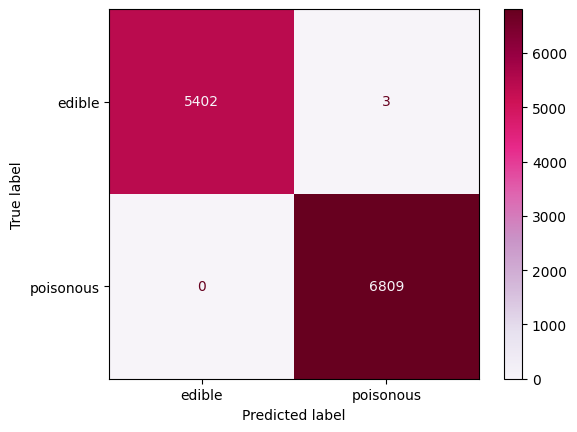

In [202]:
labels = ['edible','poisonous']
display_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_nn, display_labels=labels)
display_matrix.plot(cmap='PuRd')
plt.show()